<a href="https://colab.research.google.com/github/alfnpnd/DataAnalysis-ML/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


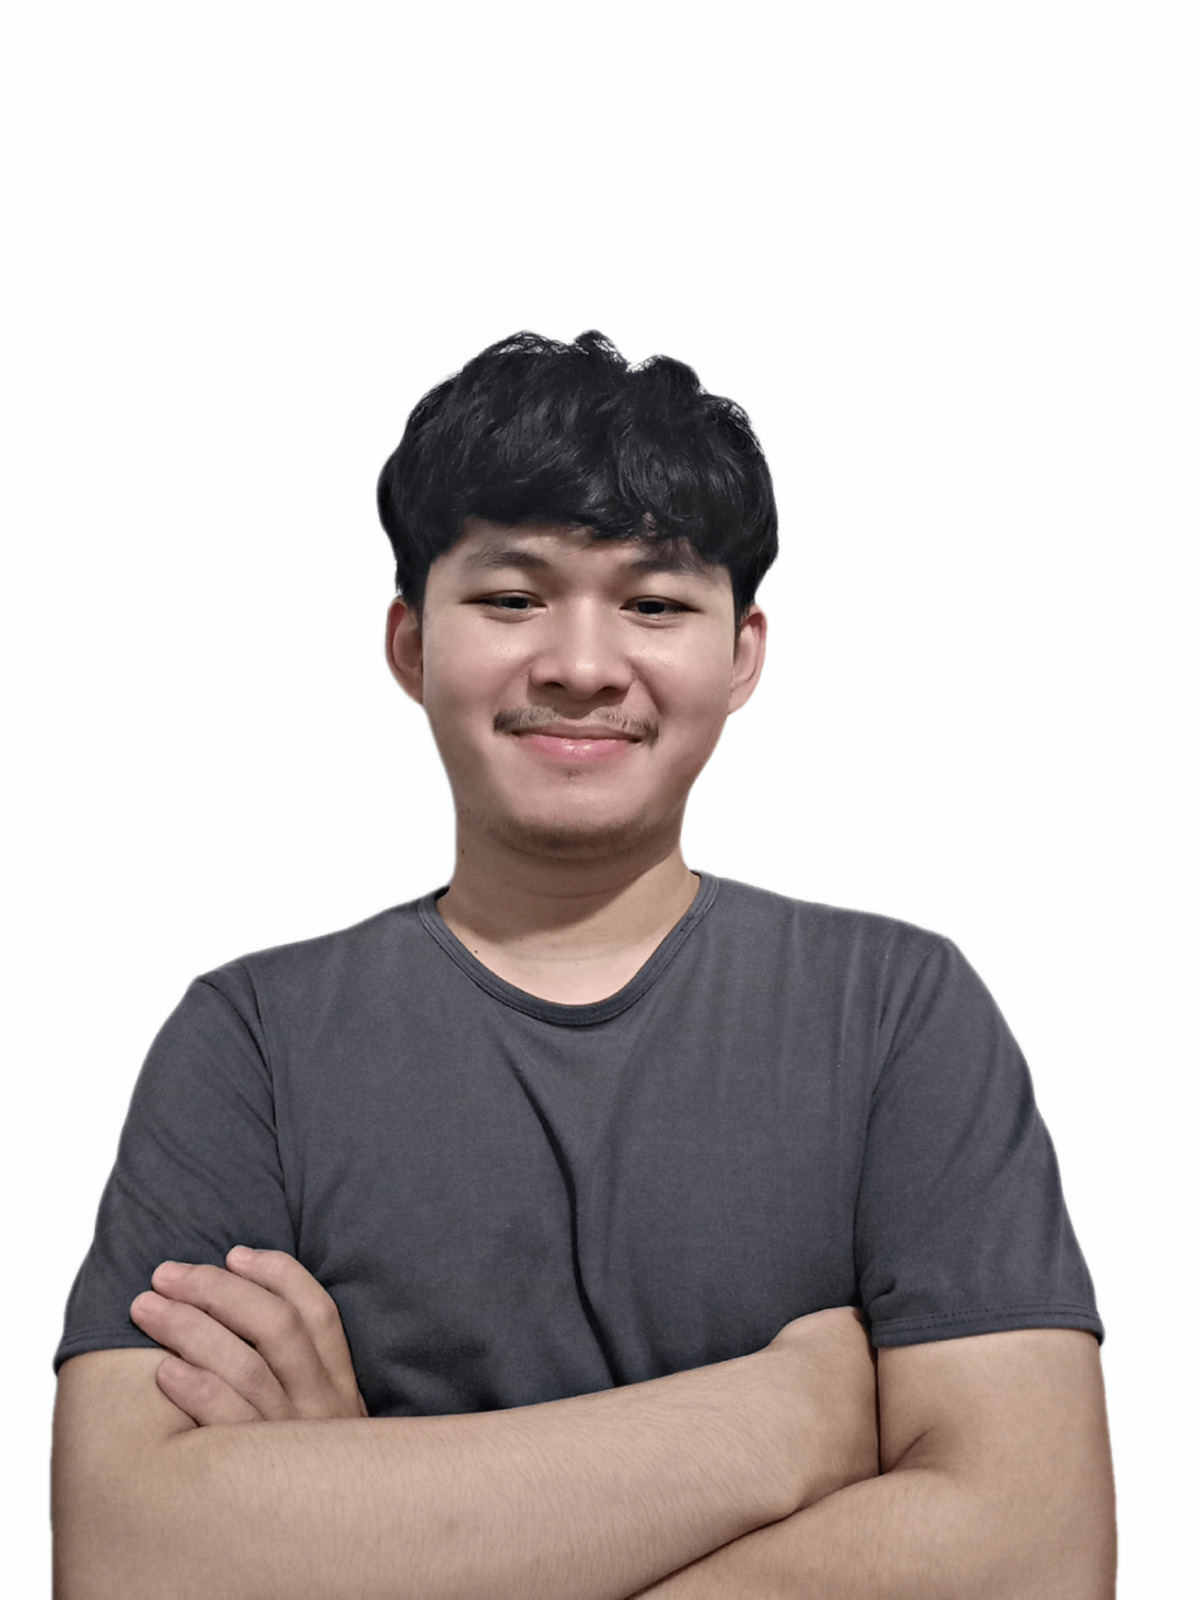

In [1]:
#@title Project
import requests
from IPython.display import Image, display
from IPython.display import HTML

# Direct image URL
image_url = "https://drive.google.com/uc?export=download&id=13DZU38w2Jn-GbTfY4UQdscoJI2sp_o0t"

# Download the image
response = requests.get(image_url)
with open('image.jpg', 'wb') as file:
    file.write(response.content)

import base64

# Convert the image to a base64 string
with open("image.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

# Create the HTML code with the base64 image
html_code = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Portfolio Header</title>
    <!-- Include Font Awesome -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: flex-start; /* Align items to the top */
            /*align-items: center;*/
            padding: 20px;
            background-color: #FFDBB5;
            border-bottom: 2px solid #ccc;
        }}
        .header img {{
            border-radius: 50%;
            width: 100px;
            height: 100px;
            object-fit: cover;
            margin-right: 20px;
            box-shadow: 0 0 20px #86e3dd; /* Glowing effect */
            vertical-align: top;
        }}
        .header .text-container {{
            display: flex;
            flex-direction: column;
        }}
        .header h1 {{
            margin: 0;
            font-size: 2em;
            color: #603F26;
        }}
        .header p {{
            margin: 5px 0 0 0;
            font-size: 1em;
            color: #603F26;
        }}
        .header .social-icons {{
            margin-top: 10px;
        }}
        .header .social-icons a {{
            margin-right: 10px;
            color: #603F26;
            text-decoration: none;
            font-size: 1.5em;
        }}
        .header .social-icons a:hover {{
            color: #000;
        }}
    </style>
</head>
<body>
    <header class="header">
        <img src="data:image/jpeg;base64,{encoded_string}" alt="Profile Picture">
        <div class="text-container">


            <h1>Big Mart Sales Analysis & Prediction</h1>
            <p>#soft_skills #sql #python #tableau</p>
            &nbsp;
            <p>Alfian Apandi</p>

            <div class="social-icons">



                <a href="https://www.linkedin.com/in/alfnpnd/" target="_blank"><i class="fab fa-linkedin"></i></a>
                <a href="mailto:alfian.apandi1@gmail.com"><i class="fas fa-envelope"></i>
                <a href="https://wa.me/6288218583486" target="_blank"><i class="fab fa-whatsapp"></i></a>



            </div>
        </div>
    </header>
</body>
</html>
"""

# Display the HTML code in the Jupyter/Colab notebook
display(HTML(html_code))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('big_mart_train.csv')

In [ ]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1272,DRM23,16.60,Low Fat,0.227190,Hard Drinks,173.9422,OUT010,1998,NaN,Tier 3,Grocery Store,172.4422
1246,FDP60,17.35,Low Fat,0.056235,Baking Goods,102.0016,OUT017,2007,NaN,Tier 2,Supermarket Type1,1619.2256
2238,FDU38,NaN,Low Fat,0.082150,Dairy,192.9504,OUT027,1985,Medium,Tier 3,Supermarket Type3,7478.2656
3386,FDT37,14.15,Low Fat,0.035470,Canned,256.3014,OUT017,2007,NaN,Tier 2,Supermarket Type1,4845.0266
5541,NCH30,17.10,Low Fat,0.067258,Household,115.1860,OUT049,1999,Medium,Tier 1,Supermarket Type1,2490.0920


# **Find shape of the dataset(Number of rows and columns)**

In [ ]:
data.shape

(8523, 12)

## **Get information of the Dataset**

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **Check Null Values in the Dataset**

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
per = data.isnull().sum()/len(data)*100
per

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


## **Taking Care of Duplicate Values**

In [ ]:
data.duplicated().any()

False

## **Handling the Missing Values**

In [ ]:
data['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [ ]:
data['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


# Univariate Imputation

In [ ]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [ ]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [ ]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [ ]:
print("Original Weight Variable Variance", data['Item_Weight'].var())
print("Weight Mean Imputed Variance", data['Item_Weight_mean'].var())
print("Weight Median Imputed Variance", data['Item_Weight_median'].var())

Original Weight Variable Variance 21.561688259836558
Weight Mean Imputed Variance 17.86012173506058
Weight Median Imputed Variance 17.869561454073647


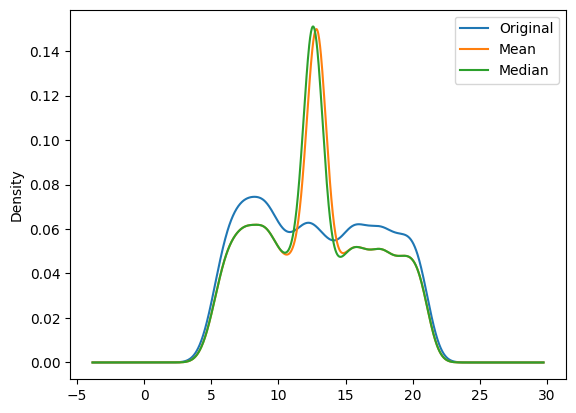

In [ ]:
data['Item_Weight'].plot(kind = "kde", label='Original')
data['Item_Weight_mean'].plot(kind = "kde", label='Mean')
data['Item_Weight_median'].plot(kind = "kde", label='Median')

plt.legend()
plt.show()

<Axes: >

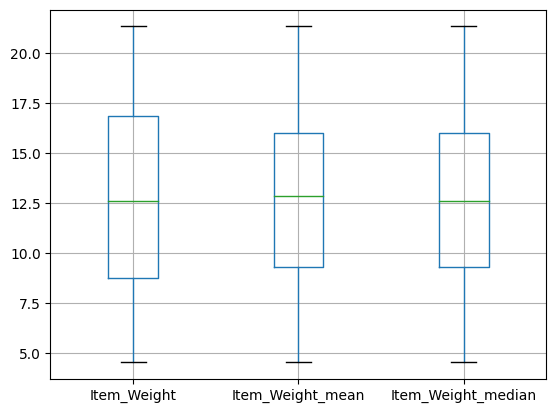

In [ ]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [ ]:
data['Item_Weight_Interpolate'] = data['Item_Weight'].interpolate(method='linear')

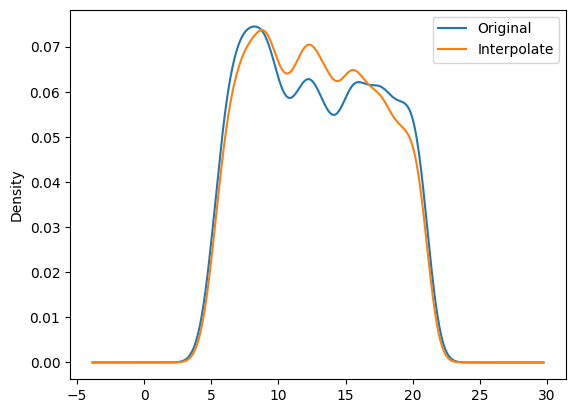

In [ ]:
data['Item_Weight'].plot(kind = "kde", label='Original')

data['Item_Weight_Interpolate'].plot(kind = "kde", label='Interpolate')

plt.legend()
plt.show()

## Multivariate Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn = KNNImputer(n_neighbors=10, weights='distance')

In [ ]:
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

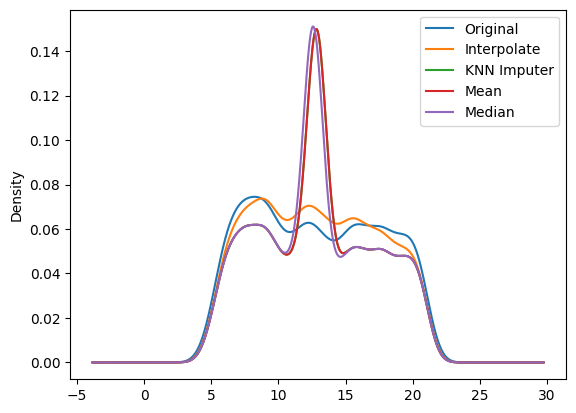

In [ ]:
data['Item_Weight'].plot(kind = "kde", label='Original')

data['Item_Weight_Interpolate'].plot(kind = "kde", label='Interpolate')

data['knn_imputer'].plot(kind = "kde", label='KNN Imputer')

data['Item_Weight_mean'].plot(kind = "kde", label='Mean')

data['Item_Weight_median'].plot(kind = "kde", label='Median')

plt.legend()
plt.show()

In [ ]:
data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'], axis = 1, inplace=True)

In [ ]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


## **Handling Categorical Missing Values**

In [ ]:
data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
data['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values = data['Outlet_Size'].isnull()
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [ ]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [ ]:
data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


## **Item_fat_Content**

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_Interpolate'],
      dtype='object')

In [ ]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
data.replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}, inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


# **Item_Visibility**

In [ ]:
data['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [ ]:
data['Item_Visibility_interpolate'] = data['Item_Visibility'].replace(0,np.nan,).interpolate(method='linear')

In [ ]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


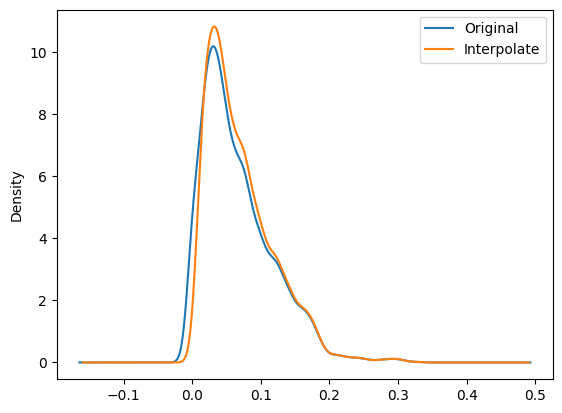

In [ ]:
data['Item_Visibility'].plot(kind = "kde", label='Original')

data['Item_Visibility_interpolate'].plot(kind = "kde", label='Interpolate')

plt.legend()
plt.show()

In [ ]:
data.drop(['Item_Visibility'], axis = 1, inplace=True)
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


# **Item_Type**

In [ ]:
data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


## **Item_Identifier**

In [ ]:
data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


In [ ]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[:2])

In [ ]:
data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


## **Outlet_Establishment_Year**

In [ ]:
data['Outlet_Establishment_Year'].value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


In [ ]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FD,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NC,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [ ]:
data.to_csv('bigmart.csv', index=False)

In [ ]:
import datetime as dt

In [ ]:
current_year = dt.datetime.today().year

In [ ]:
current_year

2024

In [ ]:
data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']

In [ ]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [ ]:
data.drop(['Outlet_Establishment_Year'], axis = 1, inplace=True)

## **Handle Categorical Columns**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    encoder = OrdinalEncoder()
    data_encoded[col]=encoder.fit_transform(data_encoded[[col]])
    print(encoder.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [ ]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [ ]:
X = data_encoded.drop(['Item_Outlet_Sales'], axis = 1)
y = data_encoded['Item_Outlet_Sales']

In [ ]:
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


## **Linear Regression**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

print(scores.mean())

0.501547093101739


## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

print(scores.mean())

0.555040442702387


## **GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics



gb = GradientBoostingRegressor()
scores = cross_val_score(gb, X, y, cv=20, scoring='r2')

print(scores.mean())

0.5918904739385024


## **XGBRFRegressor**

In [ ]:
from xgboost import XGBRFRegressor

xgb = XGBRFRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(xgb, X, y, cv=20, scoring='r2')

print(scores.mean())

0.5952991940119441


In [ ]:
xgb = XGBRFRegressor(n_estimators=100, random_state=42)

xg1 = xgb.fit(X,y)
pd.DataFrame({
    'Features':X.columns,
    'XGBRF_Importance':xg1.feature_importances_
}).sort_values(by='XGBRF_Importance', ascending=False)

,Features,XGBRF_Importance
7,Outlet_Type,0.364966
5,Outlet_Size,0.178446
10,Outlet_Age,0.148148
4,Outlet_Identifier,0.136959
3,Item_MRP,0.135346
6,Outlet_Location_Type,0.028170
9,Item_Visibility_interpolate,0.002421
8,Item_Weight_Interpolate,0.002282
2,Item_Type,0.001651
1,Item_Fat_Content,0.000879


In [ ]:
['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Weight_Interpolate','Item_Type','Item_Fat_Content','Item_Identifier']

['Outlet_Location_Type',
 'Item_Visibility_interpolate',
 'Item_Weight_Interpolate',
 'Item_Type',
 'Item_Fat_Content',
 'Item_Identifier']

In [ ]:
from xgboost import XGBRFRegressor

xgb = XGBRFRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(xg1, X.drop(['Outlet_Location_Type', 'Item_Visibility_interpolate', 'Item_Weight_Interpolate',
                                      'Item_Type','Item_Fat_Content','Item_Identifier'], axis=1), y, cv=20, scoring='r2')

print(scores.mean())

0.5969169687244091


## **BEST MODEL**

In [ ]:
from xgboost import XGBRFRegressor

xg_final = XGBRFRegressor()

xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [ ]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred = xg_final.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

714.6033522105251

In [ ]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.009


## **Save model using joblib**

In [ ]:
import joblib


In [ ]:
joblib.dump(xg_final,'bigmart_model')


['bigmart_model']

In [ ]:
model = joblib.load('bigmart_model')


In [ ]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.009


In [ ]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")


Sales Value is between 1352.589033203125 and 2781.429033203125
